# Playing around with the Tara DB

In [43]:
# imports
from importlib import reload
import numpy as np
import pandas

from matplotlib import pyplot as plt

from oceancolor.tara import io
from oceancolor.tara import spectra

# Load the DB

In [60]:
tara_db = io.load_tara_db()

In [4]:
tara_db.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
0,20101127,00:48:00,-35.9020,-55.0559,19.9823,27.9347,0.0946,0.0945,0.0951,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101127,00:49:00,-35.9039,-55.0557,19.9328,27.9828,0.0937,0.0942,0.0940,0.0935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101127,00:50:00,-35.9057,-55.0555,19.9248,27.9704,0.0950,0.0946,0.0956,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101127,00:51:00,-35.9076,-55.0552,19.9006,28.0009,0.0931,0.0939,0.0950,0.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101127,00:52:00,-35.9095,-55.0550,19.8383,28.1017,0.0932,0.0928,0.0936,0.0924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot one spectrum

In [56]:
reload(io)
reload(spectra)
wv, ap, sig = spectra.spectrum_from_row(tara_db.iloc[0])
wv, cp, sig_cp = spectra.spectrum_from_row(tara_db.iloc[0], flavor='cp')

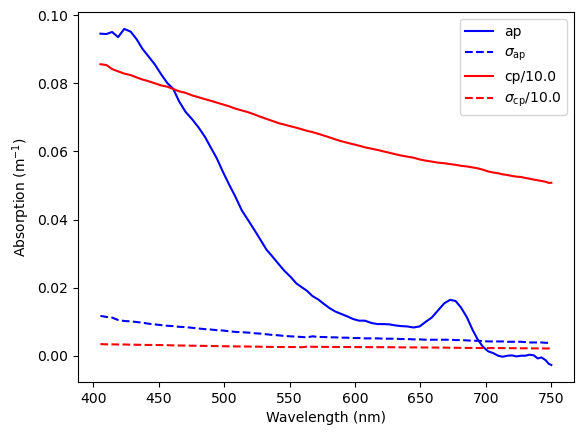

In [57]:
plt.clf()
ax = plt.gca()

# ap
ax.plot(wv,ap, color='b', label='ap')
ax.plot(wv, sig, 'b--', label=r'$\sigma_{\rm ap}$')

# cp
scl = 10.
ax.plot(wv,cp/scl, color='r', label=f'cp/{scl}')
ax.plot(wv, sig_cp/scl, 'r--', label=r'$\sigma_{\rm cp}$'+f'/{scl}')


#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Absorption (m$^{-1})$')

ax.legend()

# Average spectrum

In [45]:
sites = np.unique(tara_db.cruise)
sites

array(['AbuDhabi-Masqat', 'Alger-Barcelone', 'Athens_Beyrouth',
       'Azores-Laurient', 'BA-Ushuaia', 'Bermuda-Azores',
       'Beyruth-Alexandrie', 'CT-Rio', 'EasterIsland-Guayaquil',
       'Galapagos-Guayaquil', 'Guayaquil-Galapagos', 'Guayaquil-Gambier',
       'Honolulu-SanDiego', 'Lisbonne-Tanger', 'Madagascar-Mayotte',
       'Male-StBrandon', 'Masqat-Mumbay', 'Mauritius-Reunion',
       'Mayotte-CT', 'Moorea-Honolulu', 'Mumbay-Male', 'NY-Bermuda',
       'Panama-Savannah', 'Reunion-Madagascar', 'Rikitea-Papeete',
       'Rio-BA', 'SanDiego-Panama', 'Savannah-NewYork', 'Sharm-Jeddah',
       'Tanger-Alger', 'Ushuaia-PWilliams', 'Valparaiso-EasterIsland'],
      dtype=object)

In [47]:
rio = tara_db[tara_db.cruise == 'Rio-BA'].copy()
rio.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
169850,20101109,01:14:00,-34.9867,-48.1754,19.3156,36.0898,0.0191,0.0190,0.0198,0.0217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169851,20101109,01:15:00,-34.9881,-48.1761,19.2610,36.0558,0.0200,0.0203,0.0203,0.0219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169852,20101109,01:16:00,-34.9895,-48.1769,19.2099,36.0240,0.0205,0.0216,0.0214,0.0219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169853,20101109,01:17:00,-34.9909,-48.1777,19.1934,36.0190,0.0201,0.0215,0.0221,0.0231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169854,20101109,01:18:00,-34.9922,-48.1786,19.1972,36.0315,0.0199,0.0212,0.0218,0.0233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create spectrum

In [58]:
reload(spectra)
rio_wv, rio_ap, rio_sig = spectra.average_spectrum(rio)

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:58: RuntimeWarning: Mean of empty slice
  # Return
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:59: RuntimeWarning: Mean of empty slice
  return wv_nm, avg_vals, avg_error


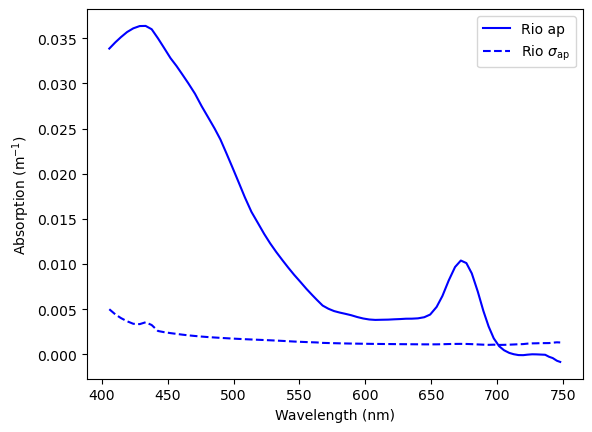

In [59]:
plt.clf()
ax = plt.gca()

# ap
ax.plot(rio_wv, rio_ap, color='b', label='Rio ap')
ax.plot(rio_wv, rio_sig, 'b--', label=r'Rio $\sigma_{\rm ap}$')

#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Absorption (m$^{-1})$')

ax.legend()